# COVID19 Visualization

![COVID19](corona.gif)

### In this is study it will be presented an exploratory data analysis for covid in the world. Then, I will focus on the data from Egypt, my home country.

## <a id='main'>Table of Contents</a>
- [First Move!!! Let's Import the Data](#import)
- [Viewing/ Inspecting Data](#inspect)
- [Data Cleaning and Wrangling](#clean)
- Visualisation
    2. [Total Cases](#total)
    3. [COVID19 in top 20 affected countries](#top20)
    
* [Analysis Cases in Egypt:](#egy)
    1. [Danger (Confirmed cases)](#danger)
    2. [Mortality (Deaths)](#death)
    3. [Congratulations (Recovered)](#recovered)
    4. [Get Well Soon (Positive to Negative Result)](#p_To_n)
    5. [Confirmed VS Recovered](#c_To_r)
    6. [Deaths VS Recovered](#d_To_r)
    7. [Hospitals Status](#hospital)
    8. [Total Cases in Egypt](#totalE)
    
   
* [Resources](#resources)


The data can be found https://www.kaggle.com/vignesh1694/covid19-coronavirus

### Column Description

- Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

    - Sno - Serial number
    - ObservationDate - Date of the observation in MM/DD/YYYY
    - Province/State - Province or state of the observation (Could be empty when missing)
    - Country/Region - Country of observation
    - Last Update - Time in UTC at which the row is updated for the given province or country. 
    - Confirmed - Cumulative number of confirmed cases till that date
    - Deaths - Cumulative number of of deaths till that date
    - Recovered - Cumulative number of recovered cases till that date

* # <a id="import">First Move!!! Let's Import the Data </a>

   [Go back to the main page](#main)

In [2]:
# Import packages
using CSV
# using Distributions
using DataFrames
# using StatsPlots
using Dates
using Plots
using PyCall  #Python call  
using Query
using PyPlot
# using Pandas
# using StatsBase
using DataFramesMeta
using Conda 
# gr()

In [3]:
# install seaborn Pkg from python 
Conda.add("seaborn")

┌ Info: Running `conda install -y seaborn` in root environment
└ @ Conda C:\Users\Gehad\.julia\packages\Conda\tJJuN\src\Conda.jl:128


Solving environment: ...working... done

# All requested packages already installed.



In [4]:
# Read the datasets
df = CSV.read("covid_19_data.csv", DataFrame)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed
,Int64,String,String?,String,String,Float64
1,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0
2,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0
3,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0
4,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0
5,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0
6,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0
7,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0
8,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0
9,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0


* # <a id="inspect">Viewing/ Inspecting Data</a>

   [Go back to the main page](#main)

In [5]:
# Get the first 5 cols
first(df,5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed
,Int64,String,String?,String,String,Float64
1,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0
2,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0
3,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0
4,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0
5,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0


In [6]:
# Last 5 clos
last(df,5) 

,SNo,ObservationDate,Province/State,Country/Region,Last Update
,Int64,String,String?,String,String
1,205947,01/19/2021,Zaporizhia Oblast,Ukraine,2021-01-20 05:21:54
2,205948,01/19/2021,Zeeland,Netherlands,2021-01-20 05:21:54
3,205949,01/19/2021,Zhejiang,Mainland China,2021-01-20 05:21:54
4,205950,01/19/2021,Zhytomyr Oblast,Ukraine,2021-01-20 05:21:54
5,205951,01/19/2021,Zuid-Holland,Netherlands,2021-01-20 05:21:54


In [7]:
# Size of the dateset
size(df)

(205951, 8)

In [8]:
# Unique countries
unique(df[:,"Country/Region"]) 


226-element Array{String,1}:
 "Mainland China"
 "Hong Kong"
 "Macau"
 "Taiwan"
 "US"
 "Japan"
 "Thailand"
 "South Korea"
 "Singapore"
 "Philippines"
 "Malaysia"
 "Vietnam"
 "Australia"
 ⋮
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Sao Tome and Principe"
 "Yemen"
 "Comoros"
 "Tajikistan"
 "Lesotho"
 "Solomon Islands"
 "Marshall Islands"
 "Vanuatu"

In [9]:
# Number of unique countries
unique_countries = size(unique(df[:,"Country/Region"]))[1] # The data contains 226 uniqe country

print("Number of different Country_Region in the dataset: ",unique_countries)

Number of different Country_Region in the dataset: 226

In [10]:
# Names of the columns 
names(df) 

8-element Array{String,1}:
 "SNo"
 "ObservationDate"
 "Province/State"
 "Country/Region"
 "Last Update"
 "Confirmed"
 "Deaths"
 "Recovered"

* # <a id="clean">Data Cleaning and Wrangling</a>

   [Go back to the main page](#main)



In [11]:
# Dropping unnecessary features
select!(df, Not(:SNo))

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths
,String,String?,String,String,Float64,Float64
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0


### Find the Active Patients and add a column "Active" to the dataset

In [12]:
df[:,"Active"] = df[:,"Confirmed"] - (df[:,"Deaths"] + df[:,"Recovered"])

205951-element Array{Float64,1}:
      1.0
     14.0
      6.0
      1.0
      0.0
     26.0
      2.0
      1.0
      4.0
      1.0
      0.0
      5.0
      0.0
      ⋮
   1348.0
  25992.0
      0.0
      4.0
   1907.0
  21473.0
   2607.0
  22586.0
  12882.0
     17.0
   4217.0
 221245.0

### Rename Columns 

In [13]:
#Using rename function to rename the columns into a nicer look 
rename!(df,[ :"Observation_Date", :"Province_State", :"Country_Region",:"Last_Update",:"Confirmed", :"Deaths", :"Recovered", :"Active"])

,Observation_Date,Province_State,Country_Region,Last_Update,Confirmed,Deaths
,String,String?,String,String,Float64,Float64
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0


### Dealing with Dates


In [14]:
# Convert ObservationDate from String to DateTime 
df.Observation_Date = Date.(df.Observation_Date, "m/d/y")

205951-element Array{Date,1}:
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 2020-01-22
 ⋮
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19
 2021-01-19

In [15]:
# The first date case of the dataset
min_date = DataFrames.minimum(df[!,"Observation_Date"])

2020-01-22

In [16]:
# The last date case of the dataset
Last_date = DataFrames.maximum(df[!,"Observation_Date"])

2021-01-19

In [17]:
# The first updated case of the dataset
min_upd = DataFrames.minimum(df[!,"Last_Update"])

"1/22/2020 17:00"

In [18]:
# The last updated case of the dataset
Max_upd = DataFrames.maximum(df[!,"Last_Update"])

"4/6/20 9:37"

* # <a id="visualization">Visualization</a>

## <a id = "total">Plot Total Cases</a>
[Go back to the main page](#main)

In [19]:
# The precentage of Active People
Active_sum = sum(df[:,:"Active"]) / sum(df[:,:"Confirmed"]) *100
print("We Found that The Active cases percentage  in The world = ",Active_sum, " %")

We Found that The Active cases percentage  in The world = 36.28815882143794 %

In [20]:
# The precentage of Death People
Deaths_sum= sum(df[:,:"Deaths"]) / sum(df[:,:"Confirmed"]) *100
print("We Found that The Deaths cases percentage  in The world = ",Deaths_sum, " %")

We Found that The Deaths cases percentage  in The world = 2.781041243055524 %

In [21]:
# The precentage of Recovered People
Recovered_sum = sum(df[:,:"Recovered"]) / sum(df[:,:"Confirmed"]) *100
print("We Found that The Recovered cases percentage  in The world = ",Recovered_sum, " %")

We Found that The Recovered cases percentage  in The world = 60.93079993550654 %

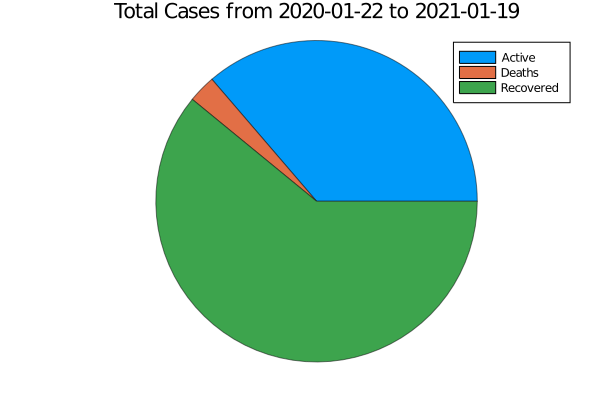

In [22]:
# Drow the pie Chart of cases in the world
labels = ["Active";"Deaths";"Recovered"]
colors = ["yellowgreen";"lightskyblue";"lightcoral"]
sizes = [Active_sum; Deaths_sum; Recovered_sum]
Plots.pie(labels, sizes, title="Total Cases from 2020-01-22 to 2021-01-19",l = 0.5)

As We Can See, The Recovered casses is much bigger than the Active cases and Deaths.

## <a id='top10'>COVID19 in top 10 affected countries</a>
I need to find the Top 10 affected countries. Since the Confirmed cases and Fatalities are the cummulative sums till date, I'll find the top 10 countries by using the country data of the last date.

In [23]:
@pyimport seaborn

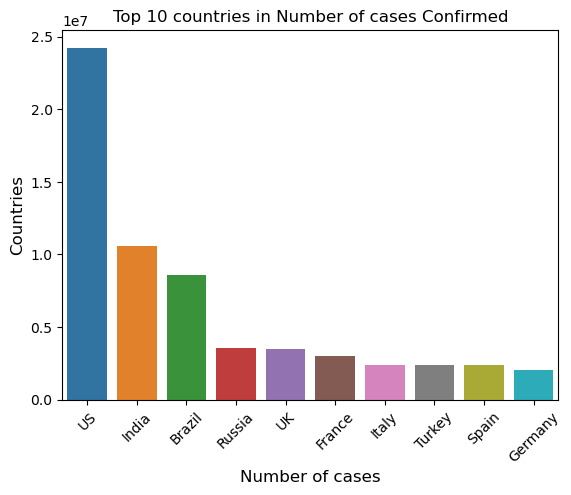

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PyObject Text(0.5, 1.0, 'Top 10 countries in Number of cases Confirmed')

In [24]:
#Get top 10 countries
df_countries = @where(df, isequal.(:Observation_Date,Last_date))
df_countries = combine(groupby(df_countries, :Country_Region), [:Confirmed, :Deaths, :Active, :Recovered] .=> sum)
df_confirmed = sort!(df_countries, :Confirmed_sum,rev = true)
#2.4e7 = 2,400,000.00
df_confirmed = first(df_confirmed,10)
seaborn.barplot(df_confirmed[!,:Country_Region], df_confirmed[!,:Confirmed_sum])
plt.xticks(rotation=45)
plt.xlabel("Number of cases", size=12)
plt.ylabel("Countries", size=12)
plt.title("Top 10 countries in Number of cases Confirmed")

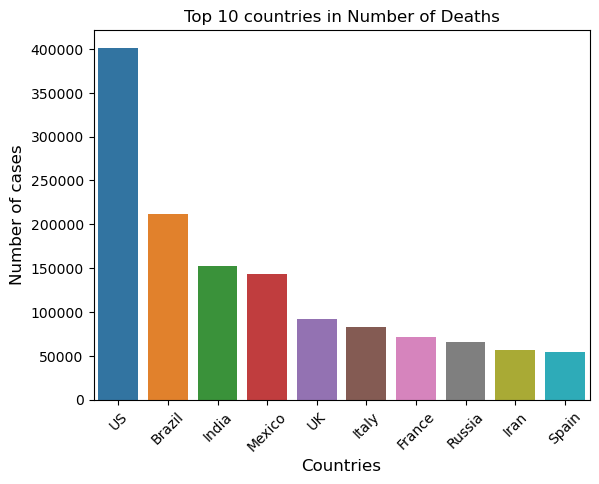

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PyObject Text(0.5, 1.0, 'Top 10 countries in Number of Deaths')

In [25]:
#Get top 10 Deaths
df_deaths = sort!(df_countries, :Deaths_sum,rev = true)
#2.4e7 = 2,400,000.00
df_deaths = first(df_deaths,10)
seaborn.barplot(df_deaths[!,:Country_Region], df_deaths[!,:Deaths_sum]);
plt.xticks(rotation=45)
plt.ylabel("Number of cases", size=12)
plt.xlabel("Countries", size=12)
plt.title("Top 10 countries in Number of Deaths")

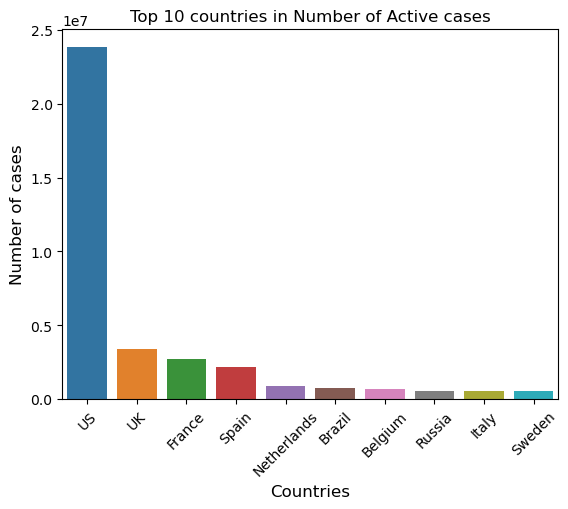

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PyObject Text(0.5, 1.0, 'Top 10 countries in Number of Active cases')

In [26]:
#Get top 10 Active
df_active = sort!(df_countries, :Active_sum,rev = true)
#2.4e7 = 2,400,000.00
df_active = first(df_active,10)
seaborn.barplot(df_active[!,:Country_Region], df_active[!,:Active_sum])
plt.xticks(rotation=45)
plt.ylabel("Number of cases", size=12)
plt.xlabel("Countries", size=12)
plt.title("Top 10 countries in Number of Active cases")

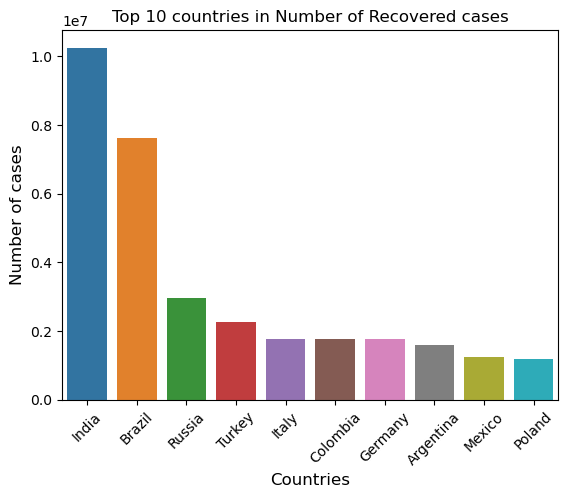

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PyObject Text(0.5, 1.0, 'Top 10 countries in Number of Recovered cases')

In [27]:
# #Get top 10 Active
df_recovered = sort!(df_countries, :Recovered_sum,rev = true)
#2.4e7 = 2,400,000.00
df_recovered = first(df_recovered,10)
seaborn.barplot(df_recovered[!,:Country_Region], df_recovered[!,:Recovered_sum])
plt.xticks(rotation=45)
plt.ylabel("Number of cases", size=12)
plt.xlabel("Countries", size=12)
plt.title("Top 10 countries in Number of Recovered cases")

* # <a id='egy'>Analysis Cases in Egypt</a>


After analysis the pandemic in all the world, We are going to focus on Egypt.

Data can be found in https://www.kaggle.com/bassemmustafa/covid19-egypt-cases

### Content:
   
    - date - Observation Date.
    - new_confirmed - New confirmed cases with COVID-19.
    - new_deaths - New death cases by COVID-19.
    - new_recovered - New recovered cases from COVID-19 that exit quarantine hospitals.
    - new_pos_to_neg - New cases whose pcr results turned to negative for COVID-19. 
    - active_pos - Number of active positive cases.
    - cases_in_hospital - Number of cases occupied in quarantine hospitals.
    - total_confirmed - Total confirmed cases with COVID-19.
    - total_deaths - Total death cases by COVID-19
    - total_recovered - Total recovered cases from COVID-19 that exit quarantine hospitals

### Reading the data

In [28]:
# Egypt = @where(df, isequal.(:Country_Region,"Egypt") )

#Reading the data file.
Egy = CSV.read("Egy-COVID-19.csv",DataFrame)

,date,new_confirmed,new_deaths,new_recovered,new_pos_to_neg,active_pos
,String,Int64,Int64,Int64,Int64,Int64
1,3/1/2020,1,0,0,0,1
2,3/2/2020,0,0,0,0,1
3,3/3/2020,0,0,0,0,1
4,3/4/2020,0,0,0,0,1
5,3/5/2020,1,0,0,0,2
6,3/6/2020,12,0,0,0,14
7,3/7/2020,33,0,0,0,47
8,3/8/2020,7,1,0,0,54
9,3/9/2020,4,0,0,20,38


### Understand the Dataset

In [29]:
# Number of columns and rows
size(Egy)

(85, 13)

In [30]:
# First 10 rows in Egypt data
first(Egy,10) 

,date,new_confirmed,new_deaths,new_recovered,new_pos_to_neg,active_pos
,String,Int64,Int64,Int64,Int64,Int64
1,3/1/2020,1,0,0,0,1
2,3/2/2020,0,0,0,0,1
3,3/3/2020,0,0,0,0,1
4,3/4/2020,0,0,0,0,1
5,3/5/2020,1,0,0,0,2
6,3/6/2020,12,0,0,0,14
7,3/7/2020,33,0,0,0,47
8,3/8/2020,7,1,0,0,54
9,3/9/2020,4,0,0,20,38


In [31]:
# last 10 rows in Egypt data
last(Egy, 10)

,date,new_confirmed,new_deaths,new_recovered,new_pos_to_neg,active_pos
,String,Int64,Int64,Int64,Int64,Int64
1,5/15/2020,399,21,173,230,7865
2,5/16/2020,491,20,151,163,8193
3,5/17/2020,510,18,222,216,8487
4,5/18/2020,535,15,268,259,8763
5,5/19/2020,720,14,302,274,9209
6,5/20/2020,745,21,252,309,9645
7,5/21/2020,774,16,223,214,10205
8,5/22/2020,783,11,157,162,10826
9,5/23/2020,727,28,254,232,11321


In [32]:
# Columns names
names(Egy)

13-element Array{String,1}:
 "date"
 "new_confirmed"
 "new_deaths"
 "new_recovered"
 "new_pos_to_neg"
 "active_pos"
 "cases_in_hospital"
 "total_confirmed"
 "total_deaths"
 "total_recovered"
 "total_pos_to_neg"
 "lockdown"
 "lockdown_duration"

In [33]:
# calculating some statistical data
DataFrames.describe(Egy)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,date,,3/1/2020,,5/9/2020,0,String
2,new_confirmed,203.106,0,139.0,783,0,Int64
3,new_deaths,8.98824,0,9.0,29,0,Int64
4,new_recovered,56.5412,0,31.0,302,0,Int64
5,new_pos_to_neg,63.1176,0,37.0,309,0,Int64
6,active_pos,2832.31,1,1476.0,11899,0,Int64
7,cases_in_hospital,3061.19,1,1618.0,12458,0,Int64
8,total_confirmed,4081.71,2,2065.0,17265,0,Int64
9,total_deaths,234.306,0,159.0,764,0,Int64


As we can see, The dataset doesnot contain any missing data 

In [34]:
#Change the dates to the proper formatting
Egy.date = Date.(Egy.date, "m/d/y")

85-element Array{Date,1}:
 2020-03-01
 2020-03-02
 2020-03-03
 2020-03-04
 2020-03-05
 2020-03-06
 2020-03-07
 2020-03-08
 2020-03-09
 2020-03-10
 2020-03-11
 2020-03-12
 2020-03-13
 ⋮
 2020-05-13
 2020-05-14
 2020-05-15
 2020-05-16
 2020-05-17
 2020-05-18
 2020-05-19
 2020-05-20
 2020-05-21
 2020-05-22
 2020-05-23
 2020-05-24

* # Visualizing Data

* # <a id = "danger">Danger (Confirmed cases)</a>

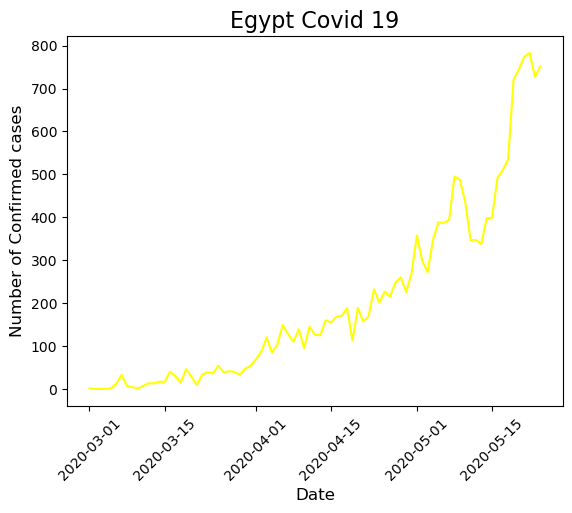

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [35]:
plt.xticks(rotation=45);
seaborn.lineplot(Egy.date, Egy.new_confirmed,color="yellow");
plt.xlabel("Date", size=12);
plt.ylabel("Number of Confirmed cases", size=12);
plt.title("Egypt Covid 19", size=16);

* # <a id = "death">Mortality (Deaths):</a>

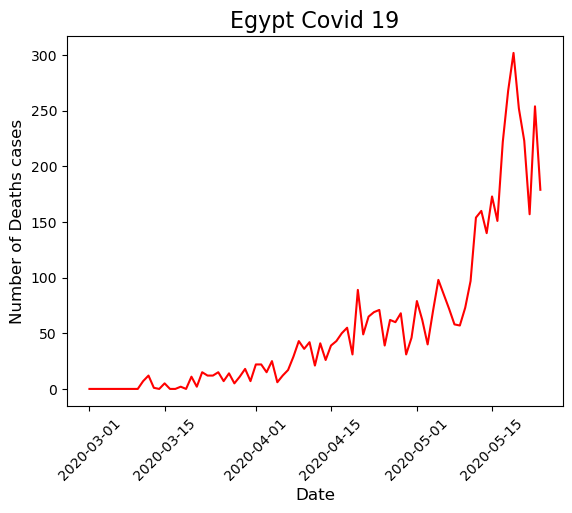

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [36]:
plt.xticks(rotation=45)
# plt.title("Top 10 countries in Number of cases")
seaborn.lineplot(Egy.date, Egy.new_recovered,color="red")
plt.xlabel("Date", size=12);
plt.ylabel("Number of Deaths cases", size=12);
plt.title("Egypt Covid 19", size=16);

* # <a id = "recovered">Congratulations (Recovered):</a>

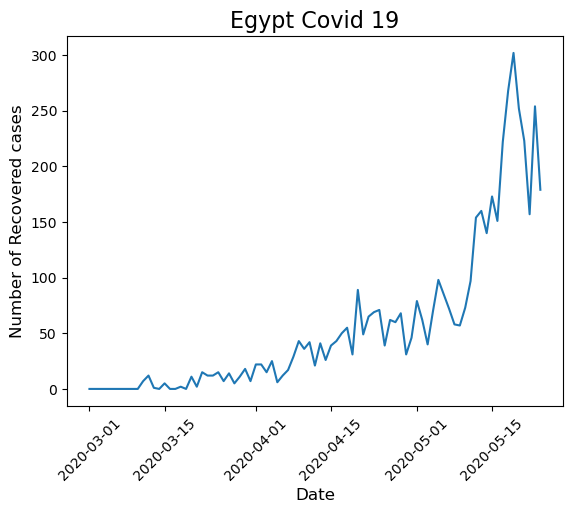

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [37]:
plt.xticks(rotation=45)
# plt.title("Top 10 countries in Number of cases")
seaborn.lineplot(Egy.date, Egy.new_recovered)
plt.xlabel("Date", size=12);
plt.ylabel("Number of Recovered cases", size=12);
plt.title("Egypt Covid 19", size=16);

* # <a id = "p_To_n">Get Well Soon (Positive to Negative Result) :</a>

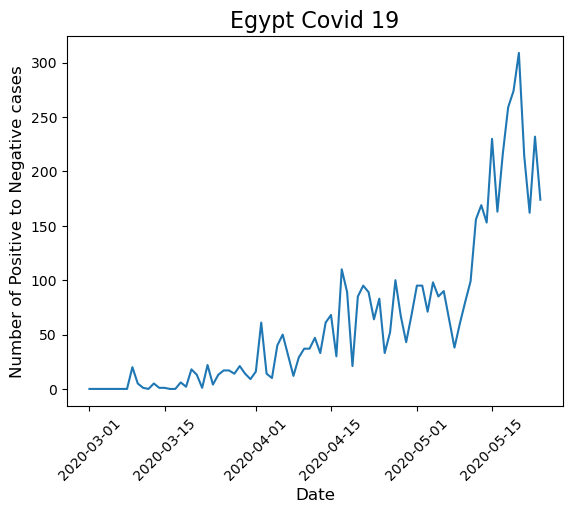

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [38]:
plt.xticks(rotation=45);
seaborn.lineplot(Egy.date, Egy.new_pos_to_neg);
plt.xlabel("Date", size=12);
plt.ylabel("Number of Positive to Negative cases", size=12);
plt.title("Egypt Covid 19", size=16);

* # <a id = "c_To_r">Confirmed VS Recovered :</a>

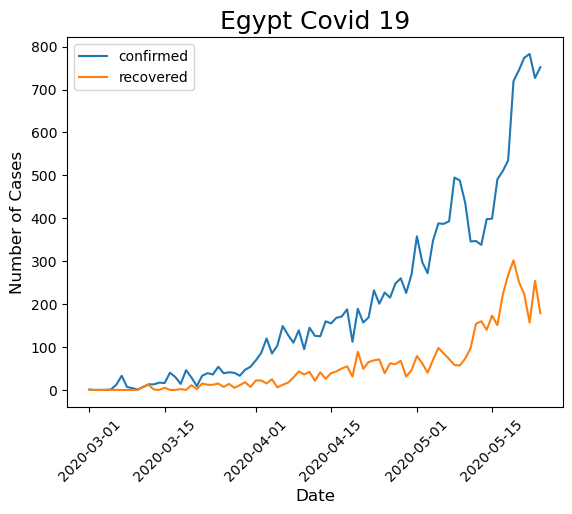

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PyObject Text(0.5, 1.0, 'Egypt Covid 19')

In [39]:
seaborn.lineplot(Egy.date, Egy.new_confirmed,label="confirmed")
seaborn.lineplot(Egy.date, Egy.new_recovered,label="recovered")
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Number of Cases", size=12)
plt.title("Egypt Covid 19", size=18)

* # <a id = "d_To_r">Deaths VS Recovered :</a>


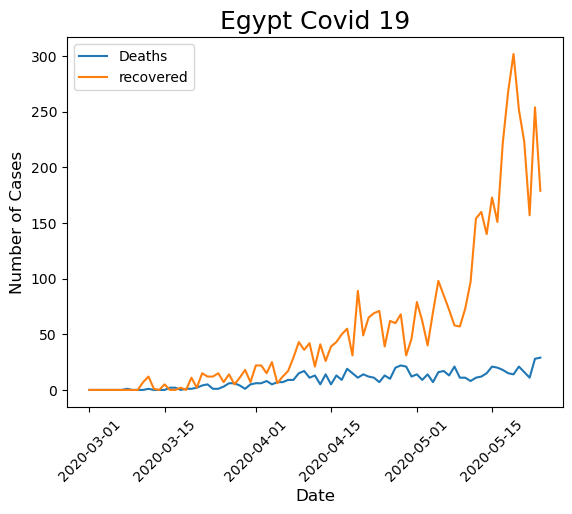

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [40]:
seaborn.lineplot(Egy.date, Egy.new_deaths,label="Deaths");
seaborn.lineplot(Egy.date, Egy.new_recovered,label="recovered");
plt.xticks(rotation=45);
plt.xlabel("Date", size=12);
plt.ylabel("Number of Cases", size=12);
plt.title("Egypt Covid 19", size=18);

* # <a id = "hospital">Hospitals Status:</a>

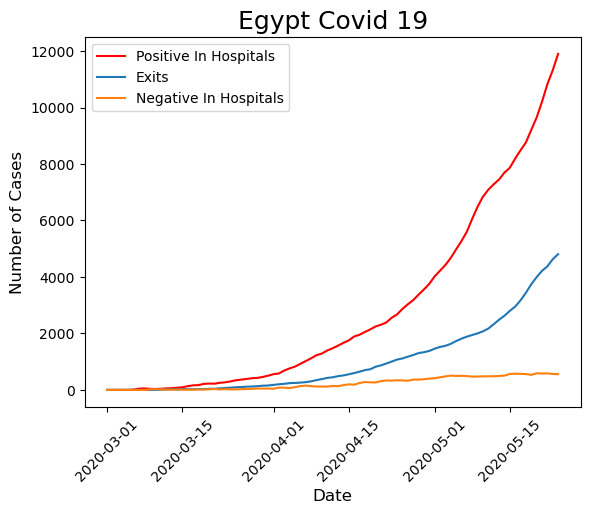

C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gehad\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [41]:
seaborn.lineplot(Egy.date, Egy.active_pos,label="Positive In Hospitals",color="red");
seaborn.lineplot(Egy.date, Egy.total_recovered,label="Exits");
Egy.Negative_in_hospitals = Egy.cases_in_hospital - Egy.active_pos;
seaborn.lineplot(Egy.date, Egy.Negative_in_hospitals,label="Negative In Hospitals");
plt.xticks(rotation=45);
plt.xlabel("Date", size=12);
plt.ylabel("Number of Cases", size=12);
plt.title("Egypt Covid 19", size=18);

* # <a id = "totalE">Total Cases in Egypt  :</a>

Total number of cases: Deaths, Actives, Recovered

In [42]:
deathsE = last(Egy.total_deaths)/ last(Egy.total_confirmed) *100
print("We Found that The Deaths cases precent in Egypt = ",deathsE, " %")

We Found that The Deaths cases precent in Egypt = 4.42513756154069 %

In [43]:
recoveredE = last(Egy.total_recovered)/ last(Egy.total_confirmed) *100
print("We Found that The Recovered cases precent in Egypt = ",recoveredE, " %")

We Found that The Recovered cases precent in Egypt = 27.84245583550536 %

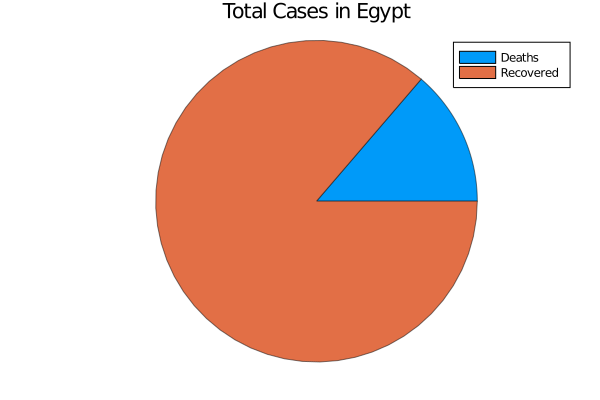

In [44]:
# Drow the pie Chart of cases in Egypt
labels = ["Deaths";"Recovered"]
 sizes = [deathsE; recoveredE]
Plots.pie(labels, sizes, title="Total Cases in Egypt",l = 0.5)

As we can see, The Recovered cases are much bigger that the Deaths' cases.

* # <a id = "resources">Resources :</a>

    [Go back to the main page](#main)
    
     1- <a href="https://jcharistech.wordpress.com/julia-dataframes-cheat-sheets">Julia DataFrames Cheat Sheat</a> <br>
     2- <a href="https://docs.julialang.org/en/v1/"> Julia Documentation</a><br>
     3- <a href= "https://julialang.org/">Julialang.org</a>

In [45]:
# # !jupyter nbconvert covid19-slides --to slides --post serve 
# !jupyter nbconvert --to slides --TemplateExporter.exclude_input=True covid19-slides